# Programming for Data Analysis: Simulating Real World Phenomenom

Author: Julian Dunne g00267940@gmit.ie

Create a data set by simulating a real-world phenomenon. Model and synthesise the data using Python. Use the numpy.random package for this purpose. The project should include:

- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

- Investigate the types of variables involved, their likely distributions, and their relationships with each other.

- Synthesise/simulate a data set as closely matching their properties as possible.

- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

# Project plan:

Cardiovascular disease (CVD) will be the subject for this project. The reason for choosing this topic is that there is many variables that noticeably increase the likelihood of developing heart disease and that these variables should be very useful for simulating a data set to demonstrate this real world phenomenom.

<b>Note:</b> The author did not intend for this project for this project to end up just being about death but that is what is after happening when trying to close out the final dataset. Apologies.

## Project Assumptions for CVD:

CVD includes all diseases of the heart and circulation but most commonly it refers to coronary heart disease (angina, heart attack), stroke and other blood vessel diseases. Other conditions include congenital heart disease, heart valve disease and disease of the heart muscle (cardiomyopathy) https://r.search.yahoo.com/_ylt=AwrJS5X7H9tfbTwAJGsM34lQ;_ylu=Y29sbwNpcjIEcG9zAzQEdnRpZANDMTExNl8xBHNlYwNzcg--/RV=2/RE=1608224891/RO=10/RU=https%3a%2f%2fwww.bhf.org.uk%2f-%2fmedia%2ffiles%2fresearch%2fheart-statistics%2fbhf-cvd-statistics-england-factsheet.pdf%3fla%3den/RK=2/RS=YZB1XVtwV_ZD6YoXP2hUbl.Qw3c-insert. 

<b>Assumption 1:</b> For the puposes of this project it will be assumed that all Cardiovascular diseases are the same disease. 

According to website MedicineNet https://www.medicinenet.com/script/main/art.asp?articlekey=203653 it is estimated that a third of all deaths around the world are the result of cardiovascular disease. This would make this disease the number one killer in the world.

<b>Assumption 2:</b> As this is worldwdide phenomenom and for the purposes of this project it will be assumed that the dataset for this study focuses only on the population distributions that would be relevant to Ireland and the United Kingdom. The reason being it would be expected that the population in these countries would be similiarly distributed including similiar work-life, diet, lifestyles etc.

***
## Attributing Factors in Developing CVD:

While researching CVD a number of contributing factors in the development of the disease have been found and will be used as variables in developing the dataset.

### Age:

More than 73.4 per cent of deaths due to cardiovascular disease in Ireland occurred in older people or those aged 75 and over https://r.search.yahoo.com/_ylt=AwrJS5X7H9tfbTwAJGsM34lQ;_ylu=Y29sbwNpcjIEcG9zAzQEdnRpZANDMTExNl8xBHNlYwNzcg--/RV=2/RE=1608224891/RO=10/RU=https%3a%2f%2fwww.bhf.org.uk%2f-%2fmedia%2ffiles%2fresearch%2fheart-statistics%2fbhf-cvd-statistics-england-factsheet.pdf%3fla%3den/RK=2/RS=YZB1XVtwV_ZD6YoXP2hUbl.Qw3c-insert file included in this projects repository.

Loooking at the table below there is a trend whereby as age increases so does the rate of deaths associated with heart and circulatory diseases which for the pupose of this project will be CVDs. It is clear age has a significant impact in mortality rates due to cardiovascular disease. 

The tables used throughout this notebook are taken from an article published by the British Heat Foundation for Heart and Circulatory Disease Statistics 2019 https://r.search.yahoo.com/_ylt=AwrJQ4wgKdtf4B4ApwoM34lQ;_ylu=Y29sbwNpcjIEcG9zAzIEdnRpZANDMTExNl8xBHNlYwNzcg--/RV=2/RE=1608227232/RO=10/RU=https%3a%2f%2fwww.bhf.org.uk%2f-%2fmedia%2ffiles%2fresearch%2fheart-statistics%2fbhf-statistics-compendium-2019-final.pdf%3fla%3den/RK=2/RS=it8Q8WAKcLL8gdLYlGPhvZq8ktY- file included in this projects repository.

<img src="deaths_by_cause_UK_2017.png" width="1000" height="1000">
<br>

Although this table is for the UK the combined percentage of deaths in the +75 year old age groups due to heart and circulatory diseases is very close to 73.4 per cent. Based on the table (49,329+75,671) / 168,472 gives 74.2 per cent of deaths due to cardiovascular disease in the UK occurred in older people or those aged 75 and over.

This provides a level of confidence that reference data from Ireland and the UK is representative of each other and suitable to use as a point of reference when assigning probabilities to the different variables that will be used to generate this dataset. 

### Gender:

According to the Vital Statistics Annual Report 2016 from the Central Statistics Office (CSO) https://irishheart.ie/news/heart-failure-is-not-a-disease/, there were a total of 9,237 deaths attributed to diseases of the circulatory system or cardiovascular disease in 2016, of which 4,768 were men and 4,469 were women. It would appear that the number of deaths between men and women in 2016 in Ireland from this disease was very similiar. 

However when looking at the table above, it would appear that that men are more likely to die at a younger age from CVD than women. This reverses when age is +85 with a higher amount of females dying due to CVD. There might be several reasons to explain this such as women living longer and therefore dying at an older age however it will have to be looked at in more detail further on.

### Tobacco Use:

According to an article in International Business Times https://www.ibtimes.co.uk/smoking-tobacco-causes-20-percent-heart-disease-related-deaths-1683751, the World Health Organization (WHO) estimates that 20 percent of heart disease-related deaths are caused by tobacco use. This would suggest that smoking tobacco noticeably increase the likelihood of death from cardiovascular disease. A table showing the estimated number of smokers in the UK was found in the same publication by the  British Heat Foundation for Heart and Circulatory Disease Statistics 2019 as above.

<img src="smokers_UK_2017.png" width="1000" height="1000">
<br>

<b>Assumption 3:</b> For the puposes of this project it will be assumed a person is either a smoker or a non-smoker. The amount of tobacco used on a daily basis will not be considered along with the obvious health implications. 

### Body Mass Index:

A persons weight is categorised primarily using the body mass index (BMI) calculation by taking a persons weight in kilograms and dividing it by the height in meters squared. A table showing the prevalence of obesity in the UK was found in the same publication by the  British Heat Foundation for Heart and Circulatory Disease Statistics 2019 as above.

<img src="obesity_UK_2017.png" width="1000" height="1000">
<br>

BMI may be an easy way to categorize weight in population-based studies, but it’s not a great way to assess an individual’s health risk without digging further. It doesn’t take into consideration things like muscle mass, body fat percentage, or where and how your body stores fat - see website for more detail https://www.self.com/story/the-science-on-weight-and-health. 

<b>Assumption 4:</b> For the purposes of this project it is assumed that a persons weight or BMI value is either "Normal-weight", "Over-weight" or "Obese". This categorisation will be done based on BMI classifications found at https://www.worldobesity.org/about/about-obesity/obesity-classification. Health implications associated with persons in the "Under-weight" category will not be considered in the project.

### Cause of Death:

Using all the data created for the above variables, the dataset will include an additional column listing the cause of death. The cause of death is either as a result of CVD or not. The probability that the cause of death is related to CVD will be impacted .

<b>Note added 28thDec2020:</b> It has been realised that by creating a population sample size that follows an actual population distribution was a mistake for this dataset. The reason being there is now thousands of deaths in the younger age groups compared to significantly lower numbers in the older age groups as their population size was smaller to begin with. For the purposes of this project it is ok to proceed as the final weighting should show that higher numbers of deaths due to cardiovascular diseases occurred in older age groups as opposed to younger.

***

## Import the required libraries for this project:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import scipy.stats as stats

## Variable 1: Age

While researching CVD the correlation between age and death as a result of the disease was noticeable. Data from studies in this area also showed that age as a category is usually grouped. This meant it was not necessary to generate specific ages for the sample of the population to be used in this project. By defining the age groups, it would be possible to generate a sample population for each group.

A dataset for age grouping and gender distribution for each age group in Ireland in 2020 https://www.populationpyramid.net/api/pp/372/2020/?csv=true was used as a starting point for this variable. 

<b>Note:</b> As this dataset only had a few lines some entries were edited in notepad++ to make it easier to work with.  

In [2]:
#Skip rows 1-3 as study will not include population less than 16 years of age
df_population = pd.read_csv("Ireland-2020.csv", skiprows=[1,2,3])

#Group data by Age_group and sum the male/female population for each age group
df_population = df_population.groupby(['Age_group']).agg({'M': ['sum'], 'F': ['sum']}).reset_index()
df_population.columns=(['Age_group', 'M', 'F'])

#Method to sum the male and female columns found on https://www.statology.org/pandas-groupby-aggregate-multiple-columns/

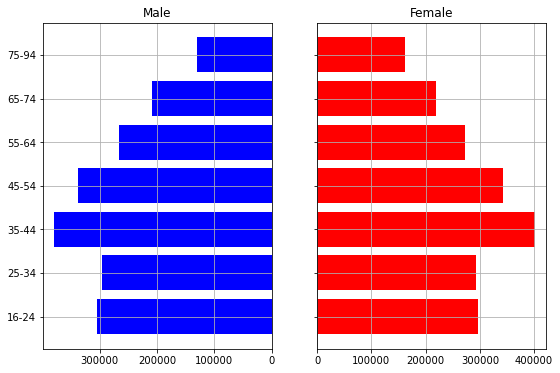

In [3]:
#Plot the number of males v females for each age group in the population
#see website https://www.statology.org/population-pyramid-python/ for pyramid subplot code

#Specify the x and y axis
y = range(len(df_population))
x_male = df_population['M']
x_female = df_population['F']

#Configure the chart
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))
axes[0].barh(y, x_male, align='center', color='blue')
axes[0].set(title='Male')
axes[1].barh(y, x_female, align='center', color='red')
axes[1].set(title='Female')

#Define the 'Age group' for the chart and invert so that charts are mirroring
axes[0].set(yticks=y, yticklabels=df_population['Age_group'])
axes[0].invert_xaxis()
axes[0].grid()
axes[1].grid()

plt.show()

Using the df_population dataframe it is possible to calculate the percentage of the population that falls into each age group.

In [4]:
#Combine male/female population for each age group and show as percentage of population
df_population['gen_count'] = df_population['M'] + df_population['F']

#round population percentage to 3 decimal places
df_population['population%'] = round(df_population['gen_count']/df_population['gen_count'].sum(), 3)
df_population

,Age_group,M,F,gen_count,population%
0,16-24,305540,296180,601720,0.154
1,25-34,296129,292470,588599,0.151
2,35-44,379535,401001,780536,0.200
3,45-54,337318,342553,679871,0.174
4,55-64,266125,272459,538584,0.138
5,65-74,209153,218590,427743,0.109
6,75-94,130065,162024,292089,0.075


This study does not need specific ages of the population, only the population distribution by age groups. It is possible to generate this data using the random choice method. The population% column will also be used to assign a probability for the popoulation size of each age group based on an overall sample size 10000.

In [5]:
#Convert to numpy array
age_list = df_population['Age_group'].to_numpy()
age_list

array(['16-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-94'],
      dtype=object)

In [6]:
#Set the seed so that the pseudo-random data chosen is repeatable
np.random.seed(2)

#Rounding the population% to 3 decimal places - rounding to 0.150 for second item so sum of values equals 1
age_population = np.random.choice(age_list, 10000, p=[0.154, 0.150, 0.200, 0.174, 0.138, 0.109, 0.075])
age_population

array(['35-44', '16-24', '45-54', ..., '55-64', '55-64', '25-34'],
      dtype=object)

In [7]:
#Count the number of times each age-group appears(each value is representative of a person)
age_group_dict = {}

for i in age_population: 

    age_group_dict[i] = age_group_dict.get(i, 0) + 1
    age_group_dict = dict(sorted(age_group_dict.items()))
    
print(age_group_dict)

{'16-24': 1597, '25-34': 1554, '35-44': 2023, '45-54': 1660, '55-64': 1330, '65-74': 1071, '75-94': 765}


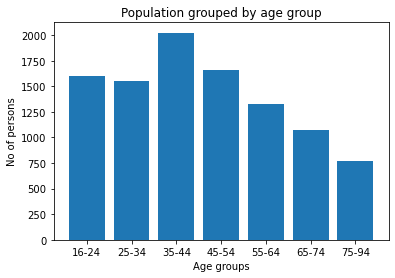

In [8]:
#Bar chart of the pseudo randomly generated data for the population and age group
plt.bar(range(len(age_group_dict)), list(age_group_dict.values()))
plt.xticks(range(len(age_group_dict)), list(age_group_dict.keys()))

plt.title("Population grouped by age group")
plt.xlabel("Age groups")
plt.ylabel("No of persons")

plt.show()

#Assistance on plotting chart using a dictionary found at
#https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary

The bar chart above follows a similiar pattern to the actual population and how it is distributed between each age group in Ireland.

In [9]:
#Preparing the simulated dataset
cvd_sim = pd.DataFrame.from_dict(age_group_dict, orient='index')
cvd_sim.columns=(['sim_pop'])

#Reference to orient='index' found at https://www.geeksforgeeks.org/how-to-convert-dictionary-to-pandas-dataframe/

In [10]:
#Reset the index so that age_group is a category 
#https://stackoverflow.com/questions/20107570/removing-index-column-in-pandas-when-reading-a-csv
cvd_sim = cvd_sim.reset_index()

In [11]:
cvd_sim.columns=(['age_group', 'sim_pop'])
cvd_sim

,age_group,sim_pop
0,16-24,1597
1,25-34,1554
2,35-44,2023
3,45-54,1660
4,55-64,1330
5,65-74,1071
6,75-94,765


***
## Variable 2: Gender

The Ireland-2020 population dataset shows that the gender ratio of male to female for each age group is very similiar. However the background reseach used in the introduction of this project and published in the British Heart Foundation and indicates that females are possibly at higher risk above 85 years of age from dying due to the disease. A gender weighting for each age group will be included when generating the data series.

In [12]:
#Convert simulated population age groupings to array
sim_pop_arr = cvd_sim['sim_pop'].to_numpy()
sim_pop_arr

array([1597, 1554, 2023, 1660, 1330, 1071,  765], dtype=int64)

In [13]:
#Determine male/female weighting based on the Ireland 2020 dataset for each age group
gend_prob = (round(((df_population['M']/df_population['F'])/2), 2)).to_numpy()
gend_prob

array([0.52, 0.51, 0.47, 0.49, 0.49, 0.48, 0.4 ])

In [14]:
#Create array that includes the simulated no. of males for each age group
sim_male = []
#Set seed sequence so results are repeatable
seed_seq = np.random.SeedSequence(44)

for pop, prob in zip(sim_pop_arr, gend_prob):

    m = np.random.default_rng(seed_seq).binomial(pop, prob, 1)
    sim_male.append(m)

sim_male

#Reference https://pythonbasics.org/pandas-iterate-dataframe/ for example on applying the zip method

[array([834], dtype=int64),
 array([797], dtype=int64),
 array([947], dtype=int64),
 array([809], dtype=int64),
 array([649], dtype=int64),
 array([511], dtype=int64),
 array([304], dtype=int64)]

In [15]:
#Convert to numpy array
sim_male_arr = np.array(sim_male)

#Convert 2d array to 1d using flatten method
#https://thispointer.com/python-convert-matrix-2d-numpy-array-to-a-1d-numpy-array/#:~:text=Convert%202D%20Numpy%20array%20to%201D%20Numpy%20array,a%20flatten%201D%20view%20of%20the%20input%20array%2C
sim_male_flat = sim_male_arr.flatten()

#Change array to pandas Series
sim_male_flat = pd.Series(sim_male_flat)

#Add the series to the simulated dataset
#This is the simulated amount of males per age group generated using random binomial method
cvd_sim['male'] = sim_male_flat

#This is the simulated amount of females per age group
cvd_sim['female'] = cvd_sim['sim_pop'] - cvd_sim['male']

cvd_sim

,age_group,sim_pop,male,female
0,16-24,1597,834,763
1,25-34,1554,797,757
2,35-44,2023,947,1076
3,45-54,1660,809,851
4,55-64,1330,649,681
5,65-74,1071,511,560
6,75-94,765,304,461


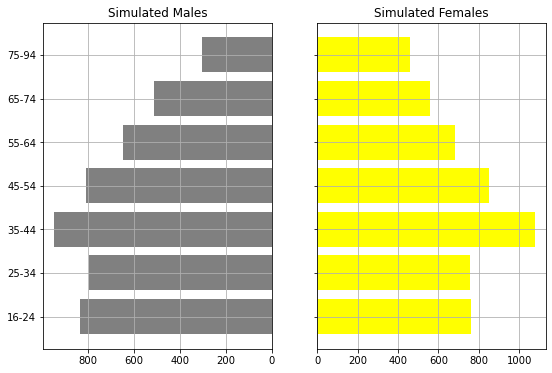

In [16]:
#Plot the number of males v females for each age group in the simulated population

#Specify the x and y axis
y1 = range(len(cvd_sim))
sim_male = cvd_sim['male']
sim_female = cvd_sim['female']

#Configure the chart
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))
axes[0].barh(y1, sim_male, align='center', color='grey')
axes[0].set(title='Simulated Males')
axes[1].barh(y1, sim_female, align='center', color='yellow')
axes[1].set(title='Simulated Females')

#Define the 'Age group' for the chart and invert so that charts are mirroring
axes[0].set(yticks=y, yticklabels=cvd_sim['age_group'])
axes[0].invert_xaxis()
axes[0].grid()
axes[1].grid()

plt.show()

***
## Variable 3: Tobacco use
   
The article published in the British Heart Foundation (table included in Tobacco Use above) shows that the percentage of male/female smokers for each age group is similiar. For the purposes of this project it will be assumed that the same percentage of the population use tobacco (dependent on age group). 

In [17]:
#The percentage of smokers per age group - taken from article published by the British Heart Found
#See Tobacco Use section above
smoker_pct = [0.18, 0.22, 0.20, 0.22, 0.16, 0.12, 0.05]
smoker_pct_arr = np.array(smoker_pct)
smoker_pct_arr

array([0.18, 0.22, 0.2 , 0.22, 0.16, 0.12, 0.05])

In [18]:
#Convert simulated population gender groupings to array
sim_m_arr = cvd_sim['male'].to_numpy()
sim_f_arr = cvd_sim['female'].to_numpy()

In [19]:
#Create array that includes the simulated no. of smokers for both genders for each age group
sim_m_smoker = []
sim_f_smoker = []

#Set seed sequence so results are repeatable
seed_seq2 = np.random.SeedSequence(88)

for prob, m_smoke, f_smoke in zip(smoker_pct_arr, sim_m_arr, sim_f_arr):

    d = np.random.default_rng(seed_seq2).binomial(m_smoke, prob, 1)
    sim_m_smoker.append(d)
    
    e = np.random.default_rng(seed_seq2).binomial(f_smoke, prob, 1)
    sim_f_smoker.append(e)

In [20]:
#Convert to numpy array
sim_m_smoker_arr = np.array(sim_m_smoker)
sim_f_smoker_arr = np.array(sim_f_smoker)

In [21]:
#Change to 1d arrays
sim_m_smoker_flat = sim_m_smoker_arr.flatten()
sim_f_smoker_flat = sim_f_smoker_arr.flatten()

In [22]:
#Change to pandas Series
sim_m_smoker_flat = pd.Series(sim_m_smoker_flat)
sim_f_smoker_flat = pd.Series(sim_f_smoker_flat)

#Add to the simulated dataset
cvd_sim['m_smoker'] = sim_m_smoker_flat
cvd_sim['f_smoker'] = sim_f_smoker_flat

cvd_sim

,age_group,sim_pop,male,female,m_smoker,f_smoker
0,16-24,1597,834,763,143,130
1,25-34,1554,797,757,167,158
2,35-44,2023,947,1076,180,205
3,45-54,1660,809,851,170,179
4,55-64,1330,649,681,99,103
5,65-74,1071,511,560,58,64
6,75-94,765,304,461,12,19


***
## Variable 4: Weight



***
## Reassessing the dataset:

When generating data in the variable sections above it was assumed that it would be a simple task to use that data to populate the entire dataset using those values. However this has not been straight forward. As time is running out for completing project and in order to progress, Variable 4: Weight will not be complete until the data in Variables 1/2/3 have been converted into the desired format to be submitted as part of the final dataset.
***

### df_cvd['age_group']:

At first it was not clear how to create the df_cvd['age_group'] column so that it would use the same values generated in the Variable 1. Using a for loop to loop through age_list[i] and sim_pop_arr[i] worked however it was clearly inefficient.

Research online led to a more efficient way to create df_cvd['age_group'] which allowed using the age group sizes generated in Variable 1:

In [23]:
#Using the age_population data generated in Variable 1
age_population_final = age_population
age_population_final = pd.Series(age_population_final)

#Create the 'age_group' variable
df_cvd = pd.DataFrame(age_population_final.sort_values(ascending=True), columns=['age_group'])
#Sorting the DataFrame at https://data-flair.training/blogs/sort-pandas-dataframes-series-array/

df_cvd = df_cvd.reset_index(drop=True)
#Reset the index at https://stackoverflow.com/questions/33165734/update-index-after-sorting-data-frame

### df_cvd['gender']:

It has not been possible to multiply the number of males and females for each age group using the data generated in Variable 2. The difficulty has been around retrieving individual pieces of data for each binomial test. It had been planned to assign a weighting for male to females for each age group as is done in Variable 2 however it was not possible to convert this into an array of 10000 values. For this reason it will be assumed that the female and male population is evenly distributed for all age groups rather than the weightings used in 'gend_prob' array above.

In [24]:
#Assume the population sizes of female/male is evenly distributed 
probability = .5

#num of flips required. This can be changed.
pop_size = 10000

#initiate array
gender_result = np.arange(pop_size)

In [25]:
#Guidance for creating array of 1's and 0's when using the random binomial method
#found on webpage https://reginaoftech.com/how-to-code-a-fair-coin-flip-in-python/

def male_fem(p):    
      
    #perform the binomial distribution (returns 0 ('female') or 1 ('male'))    
    gend_pick = np.random.default_rng().binomial(1,p, 1) 
       
    #return value to be added to numpy array    
    return gend_pick

#run pop_size test at required probability set above
for i in range(pop_size):    
    gender_result[i] = male_fem(probability)
    i+=1

#Convert array of 1's and 0's to male and females
gender_result = ['male' if x == 1 else 'female' for x in gender_result]

In [26]:
##Create the 'gender' variable
df_cvd['gender'] = gender_result

### df_cvd['smoker']:

The author has been having difficulty looping through arrays of values generated in the earlier part of this project and using these values directly in numpy random methods. For this reason some of the parameters are manually entered and the code may not be very efficient however as time is running out this is the only way to progress the project further.

<img src="smokers_UK_2017.png" width="1000" height="1000">
<br>

In [27]:
#Weightings have been taken from cigarette smoking population UK 'All' column 
#Assumed that the same percentage of female and males smoke for each population age group
smoker_pct_arr

array([0.18, 0.22, 0.2 , 0.22, 0.16, 0.12, 0.05])

In [28]:
#Assume the person is either a smoker or a non-smoker
#No differentiation between amount smoked per day
smoker_y_n = ['smoker', 'non-smoker']

smokers = []

for i in df_cvd['age_group']:
    if i == '16-24':
        #Using the average percentage of smokers per population age-group
        #Code should list through smoker_pct_arr values as opposed to the author manually inputting
        #However it was not possible to find a way to do this
        smoke_rand = np.random.choice(smoker_y_n, 1, p=[0.18, 0.82])
        smokers.append(smoke_rand)
    if i == '25-34':
        smoke_rand = np.random.choice(smoker_y_n, 1, p=[0.22, 0.78])
        smokers.append(smoke_rand)
    if i == '35-44':
        smoke_rand = np.random.choice(smoker_y_n, 1, p=[0.20, 0.80])
        smokers.append(smoke_rand)
    if i == '45-54':
        smoke_rand = np.random.choice(smoker_y_n, 1, p=[0.22, 0.78])
        smokers.append(smoke_rand)
    if i == '55-64':
        smoke_rand = np.random.choice(smoker_y_n, 1, p=[0.16, 0.84])
        smokers.append(smoke_rand)
    if i == '65-74':
        smoke_rand = np.random.choice(smoker_y_n, 1, p=[0.12, 0.88])
        smokers.append(smoke_rand)
    if i == '75-94':
        smoke_rand = np.random.choice(smoker_y_n, 1, p=[0.05, 0.95])
        smokers.append(smoke_rand)

In [29]:
#Convert to array 1-d array
smokers_arr = np.array(smokers)
smokers_arr_flat = smokers_arr.flatten()
smokers_arr_flat

array(['smoker', 'non-smoker', 'non-smoker', ..., 'smoker', 'non-smoker',
       'smoker'], dtype='<U10')

In [30]:
#Create the 'smokers' variable
smokers_ser = pd.Series(smokers_arr_flat)
df_cvd['smokers'] = smokers_ser

### df_cvd['BMI']:

The Body Mass Index (BMI) value rather than actual weight will be used to determine what category the person falls under. The BMI value for each subject in the population is said to be either a normal-weight(BMI 18.5-24.9), over-weight(BMI 25.0-29.9) or obese(BMI 30.0-42.5). BMI classifications found at https://www.worldobesity.org/about/about-obesity/obesity-classification.

<b>Assumptions for this variable:</b> 
- All BMI values over 30.0 are obese.
- Under-weight (BMI < 18.5) and associated health complications are not the focus of the project. This category will not be considered in the dataset.
- BMI values for a population are normally distributed.
- The distribution will be truncated whereby a BMI of 18.5 is the minimum values
- The average BMI value for a person in the UK is 27.5 and 63% of the population is overweight/obese http://healthsurvey.hscic.gov.uk/data-visualisation/data-visualisation/explore-the-trends/weight.aspx
- For info - Wikipedia says that 30% of Americans are obese so this value can be used as a starting point where it will be assumed out of the 63% of the UK population that 1/3=obese, 1/3=overweight, 1/3=normal weight https://en.wikipedia.org/wiki/Body_mass_index

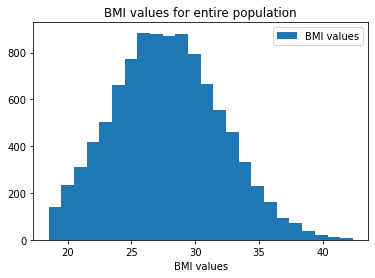

In [31]:
#Using the values axplained in Assumptions above
bmi_min = 18.5
bmi_max = 42.5
mean = 27.5

#Differet standard deviations trialled and 4.5 found to be a good fit as the values created
#are farily evenly distributed across the normal weight, overweight, obese ranges 
std_dev = 4.5

#Generate BMI values for population using the parameters provided
#Data follows a truncated normal distribution
bmi_pop = stats.truncnorm.rvs((bmi_min - mean) / std_dev, (bmi_max - mean) / std_dev, loc=mean, scale=std_dev, size=10000)

plt.hist(bmi_pop, bins= 24, label='BMI values')
plt.title('BMI values for entire population')
plt.xlabel('BMI values')
plt.legend(loc='best')
plt.show()

#Truncated normal distribution in python method found at webpage: 
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html#scipy.stats.truncnorm

In [32]:
#Quick check to see if 1/3rd of size=10000 is obese
obese = 0
for i in bmi_pop:
    if i >30.0:
        obese+=1
obese

2951

<b>Note:</b> The data looks useful as approximately 1/3rd of the values are found in the required ranges. However in its current form this dataset cannot be used as this distribution is required for each age group of the population instead of 1 distribution for the entire population.

In [33]:
#Using the values generated for the simulated population size per age group
sim_pop_arr
age_list

#Create a list to store BMI values
bmi_list = []
bmi_list2 = []

#Iterate over values in age_list and run bmi_sample times the size of that populations age group
for i in range(len(age_list)):
    
    bmi_sample = stats.truncnorm.rvs((bmi_min - mean) / std_dev, (bmi_max - mean) / std_dev, loc=mean, scale=std_dev, size=sim_pop_arr[i])
    bmi_list.append(bmi_sample)
    
    #iterate over the values in the bmi_list and append to bmi_list2 so that it is all 1 single list
    for x in bmi_sample:
        bmi_list2.append(x)

#Create the 'BMI' variable and round to 1 decimal place
df_cvd['bmi'] = bmi_list2
df_cvd['bmi'] = df_cvd['bmi'].round(decimals=1)

Plot the df_cvd['bmi'] column to demonstrate that a truncated normal distribution has been applied for each population age group.

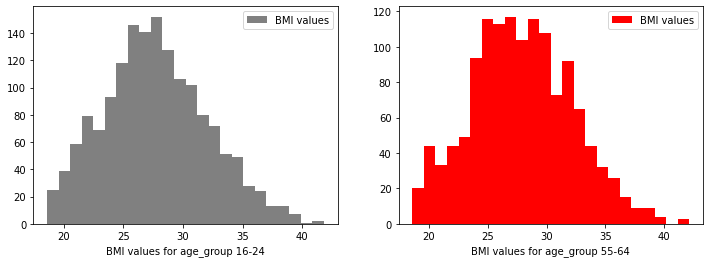

In [34]:
#Group data by population age groups and create 2 sample dataframes
ages_grouped = df_cvd.groupby(['age_group'])
trial_df = ages_grouped.get_group('16-24')
trial_df2 = ages_grouped.get_group('55-64')

#Set a figure size for the plots
plt.figure(figsize=(12, 4))

#Using subplot to display various plots side be side
plt.subplot(1, 2, 1)
plt.hist(trial_df['bmi'],  bins= 24, color='grey', label='BMI values')
plt.xlabel('BMI values for age_group 16-24')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.hist(trial_df2['bmi'],  bins= 24, color='red', label='BMI values')
plt.xlabel('BMI values for age_group 55-64')
plt.legend(loc='best')

plt.show()

### df_cvd['cause_of_death']

The purpose of this variable is to reflect the increased possibility of death due to CVD depending on values for each of the variables created.

<img src="deaths_by_cause_UK_2017.png" width="1000" height="1000">
<br>


In [35]:
#Probability of dying due to CVD reference values taken from table above
death_cvd = []

#16-24 years of age
death_cvd.append(round((921/11153), 2))
#25-34 years of age
death_cvd.append(round((921/11153), 2))
#35-44 years of age
death_cvd.append(round((1615/10045), 2))
#45-54 years of age
death_cvd.append(round((5348/24786), 2))
#55-64 years of age
death_cvd.append(round((11149/48047), 2))
#65-74 years of age
death_cvd.append(round((24439/101730), 2))
#Above 75 years of age
death_cvd.append(round(((49329+75671)/(171974+239437)), 2))

#This list will be used as a baseline reference when assigning probabilities
death_cvd

[0.08, 0.08, 0.16, 0.22, 0.23, 0.24, 0.3]

### Assigning weightings to each categorical variable using a risk matrix type approach
- Under age 75: Male = 2, Female = 1

- Over age 75: Male = 1, Female = 2

- Smoker = 4, non-smoker = 1

- Obese = 6, Overweight = 3, Normale weight = 1

<b>For information:</b> Online research indicates that obesity is a bigger health concern than smoking. Obesity will therefor be assigned a higher weighting as result

In [36]:
#Apply each weighting to possible variable combinations for the dataset

def myfunc(age, gender, smokers, bmi):
        #As per above - below 75 yo men are more at risk of cvd than women
        if age != '75-94' and gender =='male' and smokers == 'smoker' and bmi >= 30.0:
            myvalue = 2*4*6
        elif age != '75-94' and gender == 'female' and smokers == 'smoker' and bmi >= 30.0:
            myvalue = 1*4*6
        elif age != '75-94' and gender == 'male' and smokers == 'smoker' and bmi >= 25.0 < 30.0:
            myvalue = 2*4*3
        elif age != '75-94' and gender == 'female' and smokers == 'smoker' and bmi >= 25.0 < 30.0:
            myvalue = 1*4*3 
        elif age != '75-94' and gender == 'male' and smokers == 'smoker' and bmi < 25.0:
            myvalue = 2*4*1
        elif age != '75-94' and gender == 'female' and smokers == 'smoker' and bmi < 25.0:
            myvalue = 1*4*1  
        elif age != '75-94' and gender =='male' and smokers == 'non-smoker' and bmi >= 30.0:
            myvalue = 2*1*6
        elif age != '75-94' and gender == 'female' and smokers == 'non-smoker' and bmi >= 30.0:
            myvalue = 1*1*6
        elif age != '75-94' and gender =='male' and smokers == 'non-smoker' and bmi >= 25.0 < 30.0:
            myvalue = 2*1*3
        elif age != '75-94' and gender == 'female' and smokers == 'non-smoker' and bmi >= 25.0 < 30.0:
            myvalue = 1*1*3
        elif age != '75-94' and gender =='male' and smokers == 'non-smoker' and bmi < 25.0:
            myvalue = 2*1*1
        elif age != '75-94' and gender == 'female' and smokers == 'non-smoker' and bmi < 25.0:
            myvalue = 1*1*1
   
        #Above 75 yo women are more at risk of cvd than men    
        elif age == '75-94' and gender =='female' and smokers == 'smoker' and bmi >= 30.0:
            myvalue = 2*4*6
        elif age == '75-94' and gender == 'male' and smokers == 'smoker' and bmi >= 30.0:
            myvalue = 1*4*6
        elif age == '75-94' and gender == 'female' and smokers == 'smoker' and bmi >= 25.0 < 30.0:
            myvalue = 2*4*3
        elif age == '75-94' and gender == 'male' and smokers == 'smoker' and bmi >= 25.0 < 30.0:
            myvalue = 1*4*3 
        elif age == '75-94' and gender == 'female' and smokers == 'smoker' and bmi < 25.0:
            myvalue = 2*4*1
        elif age == '75-94' and gender == 'male' and smokers == 'smoker' and bmi < 25.0:
            myvalue = 1*4*1  
        elif age == '75-94' and gender =='female' and smokers == 'non-smoker' and bmi >= 30.0:
            myvalue = 2*1*6
        elif age == '75-94' and gender == 'male' and smokers == 'non-smoker' and bmi >= 30.0:
            myvalue = 1*1*6
        elif age == '75-94' and gender =='female' and smokers == 'non-smoker' and bmi >= 25.0 < 30.0:
            myvalue = 2*1*3
        elif age == '75-94' and gender == 'male' and smokers == 'non-smoker' and bmi >= 25.0 < 30.0:
            myvalue = 1*1*3
        elif age == '75-94' and gender =='female' and smokers == 'non-smoker' and bmi < 25.0:
            myvalue = 2*1*1
        elif age == '75-94' and gender == 'male' and smokers == 'non-smoker' and bmi < 25.0:
            myvalue = 1*1*1
        
        else:
            myvalue=0
        
        return myvalue

#Assistance for creating a new column based on multiple conditions and columns in a pandas dataframe: 
#https://stackoverflow.com/questions/30631841/pandas-how-do-i-assign-values-based-on-multiple-conditions-for-existing-columns

In [37]:
#Create a 'correlation' column that takes into account risk factors associated with each variable
df_cvd['correlation'] = df_cvd.apply(lambda x: myfunc(x['age_group'], x['gender'], x['smokers'], x['bmi']), axis=1)
df_cvd

,age_group,gender,smokers,bmi,correlation
0,16-24,male,smoker,36.9,48
1,16-24,male,non-smoker,30.4,12
2,16-24,female,non-smoker,25.7,3
3,16-24,male,non-smoker,37.1,12
4,16-24,male,non-smoker,29.8,6
...,...,...,...,...,...
9995,75-94,female,non-smoker,26.8,6
9996,75-94,female,non-smoker,33.0,12
9997,75-94,male,smoker,27.5,12
9998,75-94,male,non-smoker,22.6,1


In [38]:
#The entire population either dies from 'cvd' or from 'other' causes
way_to_die = ['cvd', 'other']

In [39]:
def decfunc(age, correlation):
    
    if age =='16-24' and correlation == 48:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.14, 0.86])
    elif age =='16-24' and correlation == 24:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.12, 0.88])    
    elif age =='16-24' and correlation == 12:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.10, 0.90])    
    elif age =='16-24' and correlation == 6 or 8:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.08, 0.92])
    elif age =='16-24' and correlation == 2 or 3 or 4:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.06, 0.94])
    elif age =='16-24' and correlation == 1:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.04, 0.96])
        
        
    elif age =='25-34' and correlation == 48:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.14, 0.86])
    elif age =='25-34' and correlation == 24:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.12, 0.88])    
    elif age =='25-34' and correlation == 12:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.10, 0.90])    
    elif age =='25-34' and correlation == 6 or 8:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.08, 0.92])
    elif age =='25-34' and correlation == 2 or 3 or 4:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.06, 0.94])
    elif age =='25-34' and correlation == 1:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.04, 0.96])
        
        
    elif age =='35-44' and correlation == 48:   
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.26, 0.74])
    elif age =='35-44' and correlation == 24:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.22, 0.78])
    elif age =='35-44' and correlation == 12:   
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.18, 0.82])
    elif age =='35-44' and correlation == 6 or 8:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.15, 0.85])
    elif age =='35-44' and correlation == 2 or 3 or 4:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.12, 0.88])
    elif age =='35-44' and correlation == 1:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.09, 0.91])    
        
    elif age =='45-54' and correlation == 48:   
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.35, 0.65])
    elif age =='45-54' and correlation == 24:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.31, 0.69])
    elif age =='45-54' and correlation == 12:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.27, 0.73])
    elif age =='45-54' and correlation == 6 or 8:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.24, 0.76])
    elif age =='45-54' and correlation == 2 or 3 or 4:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.21, 0.79])    
    elif age =='45-54' and correlation == 1:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.18, 0.82])
    
    elif age =='55-64' and correlation == 48:   
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.38, 0.62])
    elif age =='55-64' and correlation == 24:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.30, 0.70])
    elif age =='55-64' and correlation == 12:  
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.26, 0.74])
    elif age =='55-64' and correlation == 6 or 8:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.22, 0.78])
    elif age =='55-64' and correlation == 2 or 3 or 4:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.18, 0.82])    
    elif age =='55-64' and correlation == 1:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.14, 0.86])    
        
    elif age =='65-74' and correlation == 48:   
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.40, 0.60])
    elif age =='65-74' and correlation == 24:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.32, 0.68])
    elif age =='65-74' and correlation == 12:  
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.28, 0.72])
    elif age =='65-74' and correlation == 6 or 8:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.24, 0.76])
    elif age =='65-74' and correlation == 2 or 3 or 4:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.20, 0.80])    
    elif age =='65-74' and correlation == 1:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.16, 0.84])    
        
    elif age =='75-94' and correlation == 48:  
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.45, 0.55])
    elif age =='75-94' and correlation == 24:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.40, 0.60])
    elif age =='75-94' and correlation == 12:  
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.35, 0.65])
    elif age =='75-94' and correlation == 6 or 8:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.30, 0.70])
    elif age =='75-94' and correlation == 2 or 3 or 4:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.25, 0.75])    
    elif age =='75-94' and correlation == 1:
        cause_of_death = np.random.default_rng().choice(way_to_die, 1, p=[0.20, 0.80])    
        
    else:
        cause_of_death = None
    
    return cause_of_death

In [40]:
cause_arr = df_cvd.apply(lambda x: decfunc(x['age_group'], x['correlation']), axis=1)
cause_lst = list(cause_arr)

#Convert to numpy array
cause_arr = np.array(cause_lst)

#Convert 2d array to 1d using flatten method
#https://thispointer.com/python-convert-matrix-2d-numpy-array-to-a-1d-numpy-array/#:~:text=Convert%202D%20Numpy%20array%20to%201D%20Numpy%20array,a%20flatten%201D%20view%20of%20the%20input%20array%2C
cause_flat = cause_arr.flatten()

#Change array to pandas Series
cause_ser = pd.Series(cause_flat)

df_cvd['cause_of_death'] = cause_ser

In [41]:
pd.set_option('display.max_rows', None)
#drop correlation column as this is not required for the final dataset
final_cvd_df = df_cvd.drop('correlation' ,axis=1)
final_cvd_df

,age_group,gender,smokers,bmi,cause_of_death
0,16-24,male,smoker,36.9,other
1,16-24,male,non-smoker,30.4,other
2,16-24,female,non-smoker,25.7,other
3,16-24,male,non-smoker,37.1,other
4,16-24,male,non-smoker,29.8,other
5,16-24,male,smoker,38.3,other
6,16-24,male,non-smoker,27.8,other
7,16-24,male,non-smoker,24.9,other
8,16-24,female,non-smoker,29.8,other
9,16-24,male,non-smoker,24.9,other
